In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import math
from sklearn import metrics

In [2]:
test = pd.read_csv("benchmark_test.csv")

In [3]:
# Find for every row in test set the predicted mood
def predictBenchmark(test):
    solutions = pd.DataFrame(data={'id': [], 'date': [], 'mood_mean_target': [], 'predicted_mood_mean_target':[]})
    for index, row in test.iterrows():
        solutions = solutions.append({'id': row.id, 'date': row.date, 'mood_mean_target': row.mood_mean_TARGET,
                                      'predicted_mood_mean_target': row.mood_mean}, ignore_index=True)
    return solutions

In [4]:
solutions = predictBenchmark(test)
msq = metrics.mean_squared_error(solutions['predicted_mood_mean_target'],solutions['mood_mean_target'])
r2 = metrics.r2_score(solutions['predicted_mood_mean_target'],solutions['mood_mean_target'])
print(msq, r2)

0.48978995198902603 0.10541482924813361


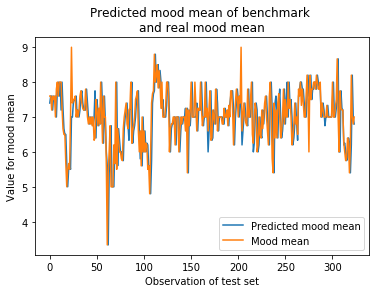

In [71]:
import matplotlib.pyplot as plt
plt.plot(solutions['predicted_mood_mean_target'])
plt.plot(solutions['mood_mean_target'])
plt.legend(["Predicted mood mean", "Mood mean"])
plt.xlabel('Observation of test set')
plt.ylabel('Value for mood mean')
plt.title('Predicted mood mean of benchmark \nand real mood mean')
plt.savefig("benchmark1")

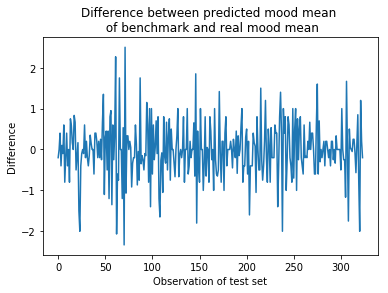

In [72]:
plt.plot(solutions['predicted_mood_mean_target'] - solutions['mood_mean_target'])
plt.xlabel('Observation of test set')
plt.ylabel('Difference')
plt.title('Difference between predicted mood mean \n of benchmark and real mood mean')

plt.savefig("benchmark2")

In [81]:
difference = solutions['predicted_mood_mean_target'] - solutions['mood_mean_target']
(np.mean(abs(difference)), np.std(abs(difference)))

(0.513528806584362, 0.47547672582058814)